<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [1]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2022-10-05 17:57:58--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz.1’

15_scenes_Xy.npz.1  100%[===================>]  34.29M  23.0MB/s    in 1.5s    

2022-10-05 17:58:00 (23.0 MB/s) - ‘15_scenes_Xy.npz.1’ saved [35952210/35952210]



In [2]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [3]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [4]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

Then a validation set from the train set:

In [6]:
skf = StratifiedKFold(n_splits=5)
for train, valid in skf.split(X_train, y_train):
  X_train = X[train]
  y_train = y[train]
  X_valid = X[valid]
  y_valid = y[valid]
  break

In [7]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(3049, 1001) (3049,) (763, 1001) (763,) (673, 1001) (673,)


Let's hyperparameter gridsearch over different values of `C`:

In [8]:
C_values = np.logspace(0.1, 2, num=10)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')

  clf = SVC(C=c)

  # Fit on sub-train set
  clf.fit(X_train, y_train)

  # Evaluate on val set
  acc = clf.score(X_valid, y_valid)
  accuracies.append(acc)

  print(f'--> accuracy = {acc}')

Training SVM with C=1.2589254117941673
--> accuracy = 0.5150720838794234
Training SVM with C=2.046968271807521
--> accuracy = 0.5491480996068152
Training SVM with C=3.328298139454621
--> accuracy = 0.5910878112712975
Training SVM with C=5.411695265464636
--> accuracy = 0.6317169069462647
Training SVM with C=8.79922543569107
--> accuracy = 0.653997378768021
Training SVM with C=14.30722989193758
--> accuracy = 0.6775884665792923
Training SVM with C=23.263050671536263
--> accuracy = 0.6867627785058977
Training SVM with C=37.82489906389386
--> accuracy = 0.6998689384010485
Training SVM with C=61.501950427522104
--> accuracy = 0.7024901703800787
Training SVM with C=100.0
--> accuracy = 0.7024901703800787


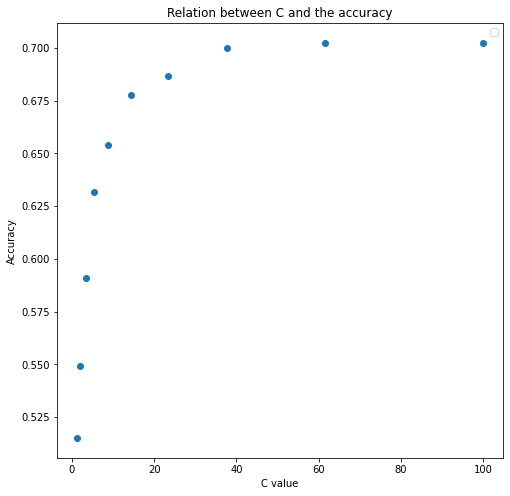

In [9]:
# TODO plot the relation between `c` and the accuracy
plt.figure(figsize=(8,8))
plt.scatter(C_values, accuracies)
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Relation between C and the accuracy")
plt.show()

In [10]:
clf = SVC(C=57)
clf.fit(X_train, y_train)
acc1 = clf.score(X_train, y_train)
acc2 = clf.score(X_valid, y_valid)

print(acc1, acc2)

0.9970482125286979 0.7051114023591087


Do the same with different kernel values, and different decision functions:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# C_values = [57]
# C_values = np.logspace(0.1, 3, num=10)
C_values = np.logspace(0.1, 2, num=10)
parameters = {'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':C_values, 'class_weight':[None, 'balanced'], 'decision_function_shape':['ovr', 'ovo']}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([  1.25892541,   2.04696827,   3.32829814,   5.41169527,
         8.79922544,  14.30722989,  23.26305067,  37.82489906,
        61.50195043, 100.        ]),
                         'class_weight': [None, 'balanced'],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')},
             verbose=3)

In [12]:
df = pd.DataFrame(clf.cv_results_)
df

{'mean_fit_time': array([3.97842107, 4.83994842, 4.97333174, 8.37051816, 4.26854024,
        5.64974608, 4.89785705, 5.11283989, 4.61420083, 4.99355226,
        4.57161455, 5.25837126, 3.90607228, 4.92260203, 4.53969088,
        5.68556275, 3.91380348, 5.36094637, 4.00328703, 4.79294682,
        3.86858745, 4.4520319 , 3.95140972, 4.79473228, 3.89242449,
        4.74423561, 4.26003413, 4.87006445, 3.89322262, 4.60493636,
        4.20573692, 5.10471025, 3.84850726, 3.9982759 , 3.6985054 ,
        4.59450665, 3.88276291, 4.18497086, 3.82517228, 4.51753931,
        3.81853476, 4.12324862, 4.0078002 , 4.48952413, 3.81964626,
        4.10288835, 4.03828921, 4.80813208, 3.87342911, 3.77907777,
        3.61472383, 4.27590833, 3.81453943, 3.64770513, 3.80190458,
        4.41761742, 3.89464674, 3.76278648, 3.85907316, 4.4709516 ,
        3.86176982, 3.74361448, 3.95010285, 4.44584908, 3.88489585,
        3.5561264 , 3.56591702, 4.08818178, 3.86198368, 3.48073845,
        3.45168862, 4.24424829,

In [13]:
clf.best_params_

{'C': 100.0,
 'class_weight': 'balanced',
 'decision_function_shape': 'ovr',
 'kernel': 'rbf'}

In [14]:
clf.score(X_test, y_test)

0.9138187221396731